<a href="https://colab.research.google.com/github/p0mona/university_data_analysis_methods/blob/main/mad_lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn plotly plotly[express] anywidget

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from eurostat import get_data_df

In [ ]:
orders = pd.read_csv('https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_10/data/zamowienia.csv', sep=";")
orders['Data zamowienia'] = pd.to_datetime(orders['Data zamowienia'])
orders.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Kowalski,2003-07-16,10248,440.00
1,Polska,Sowiński,2003-07-10,10249,1863.40
2,Niemcy,Peacock,2003-07-12,10250,1552.60
3,Niemcy,Leverling,2003-07-15,10251,654.06
4,Niemcy,Peacock,2003-07-11,10252,3597.90


In [ ]:
!pip install eurostat

In [ ]:
df = get_data_df('demo_gind')
df.head()

,freq,indic_de,geo\TIME_PERIOD,1960,1961,1962,1963,1964,1965,1966,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,A,AVG,AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,72419.0,NaN,75486.0,76860.0,NaN,NaN,80562.0,83345.0,NaN
1,A,AVG,AL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2880694.0,2876092.0,2873458.0,2866376.0,2854191.0,2837848.0,2811667.0,2777689.0,NaN,NaN
2,A,AVG,AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3004588.0,2992364.0,2979442.0,2969001.0,2962482.0,2961473.0,NaN,NaN,2984166.0,NaN
3,A,AVG,AT,7047539.0,7086299.0,7129864.0,7175811.0,7223801.0,7270889.0,7322066.0,...,8642699.0,8736668.0,8797566.0,8840521.0,8879920.0,8916864.0,8955797.0,9041851.0,9131761.0,NaN
4,A,AVG,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9649341.0,9757812.0,9854033.0,9939771.0,10024283.0,10093121.0,10137750.0,10141756.0,10153958.0,NaN


In [ ]:
df = df.rename(columns={'geo\\TIME_PERIOD': 'geo'})

df_melted = df.melt(
  id_vars=['freq', 'indic_de', 'geo'],
  var_name='year',
  value_name='value'
)

df_melted['year'] = pd.to_numeric(df_melted['year'], errors='coerce')

**Zadanie 1**

Zbiór danych: `zamowienia.csv`

Bazując na przykładzie z wykresem plotly typu sunburst dla dwóch cech: `Kraj` oraz `Sprzedawca` stwórz wykresy tego samego typu:
* z rozkładem wartości dla cechy `Kraj` oraz roku z cechy `Data zamowienia`
* z rozkładem wartości dla cechy `Sprzedawca` oraz roku z cechy `Data zamowienia`
* z rozkładem wartości dla cechy `Kraj`, roku oraz `Sprzedawcy`.

Dla ułatwienia całej operacji stwórz w ramce danych kolumnę, która zawierać będzie wartość `year` z kolumny `Data zamowienia` (w komórce, w której zbiór został wczytany została skonwertowana na typ datetime).

In [ ]:
#1.1
orders['Rok'] = orders['Data zamowienia'].dt.year
fig = px.sunburst(orders, path=['Kraj', 'Rok'], values='Utarg')
fig.show()

In [ ]:
#1.2
fig = px.sunburst(orders, path=['Sprzedawca', 'Rok'], values='Utarg')
fig.show()

In [ ]:
#1.3
fig = px.sunburst(orders, path=['Kraj', 'Rok', 'Sprzedawca'], values='Utarg')
fig.show()

**Zadanie 2**

Zbiór danych: EUROSTAT `DEMO_GIND` (ten sam co w przykładach).

Odpowiedz na poniższe pytania dotyczące powyższego zbioru:

**2.1** Jak wygląda wykres zmiany średniej liczby ludności (indic_de = AVG) dla strefy Euro (geo = EA19)?

**2.2** Jak wygląda wskaźnik śmiertelności dla Polski w porównaniu z tym samym wskaźnikiem dla Niemiec, Czech, Francji oraz Szwecji? Wyświetl dane w postaci wykresu liniowego dla wielu serii.

**2.3** Jak wygląda struktura ludności 20 najludniejszych państw Unii Europejskiej za rok 2023? Dane wyświetl na wykresie kołowym z wykorzystaniem biblioteki plotly.

**2.4** Które 3 państwa mają najbardziej zbliżoną liczbę ludności do Polski biorąc pod uwagę rok 2023?

**2.5** Wyświetl wykres liniowy porównujący liczbę narodzin i śmierci (wykorzystaj bibliotekę plotly) dla Unii Europejskiej w latach 2007-2023. Tutaj należy złączyć dane z trzech cech geo w jeden wektor:

* [EU27_2020] - European Union - 27 countries (from 2020)
* [EU28] European Union - 28 countries (2013-2020)
* [EU27_2007] European Union - 27 countries (2007-2013)

Pamiętaj o odpowiedniej kolejności złączenia tych danych.

In [ ]:
#2.1
df_sub = df_melted[(df_melted['indic_de'] == 'AVG') & (df_melted['geo'] == 'EA19')]

In [ ]:
df_sub

,freq,indic_de,geo,year,value
15,A,AVG,EA19,1960,264266345.0
1575,A,AVG,EA19,1961,266541724.0
3135,A,AVG,EA19,1962,269202591.0
4695,A,AVG,EA19,1963,271893272.0
6255,A,AVG,EA19,1964,274251532.0
...,...,...,...,...,...
93615,A,AVG,EA19,2020,342738119.0
95175,A,AVG,EA19,2021,342957128.0
96735,A,AVG,EA19,2022,343974571.0
98295,A,AVG,EA19,2023,345509516.0


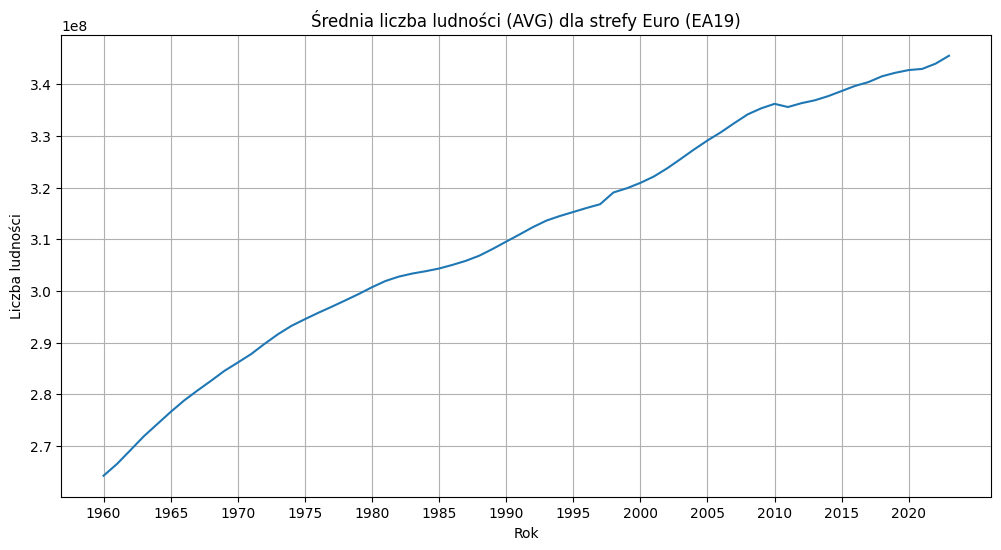

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sub, x='year', y='value')
plt.title('Średnia liczba ludności (AVG) dla strefy Euro (EA19)')
plt.xlabel('Rok')
plt.ylabel('Liczba ludności')
plt.xticks(ticks=range(1960, 2024, 5))
plt.grid(True);

In [ ]:
unique_values = df['indic_de'].unique()
print(unique_values)

['AVG' 'CNMIGRAT' 'CNMIGRATRT' 'DEATH' 'FAVG' 'FDEATH' 'FJAN' 'FLBIRTH'
 'GBIRTHRT' 'GDEATHRT' 'GROW' 'GROWRT' 'JAN' 'LBIRTH' 'MAVG' 'MDEATH'
 'MIGT' 'MIGTRT' 'MJAN' 'MLBIRTH' 'NATGROW' 'NATGROWRT' 'NATT' 'NATTRT'
 'POPSHARE' 'POPSHARE_EU27_2020' 'POPT' 'POPTRT']


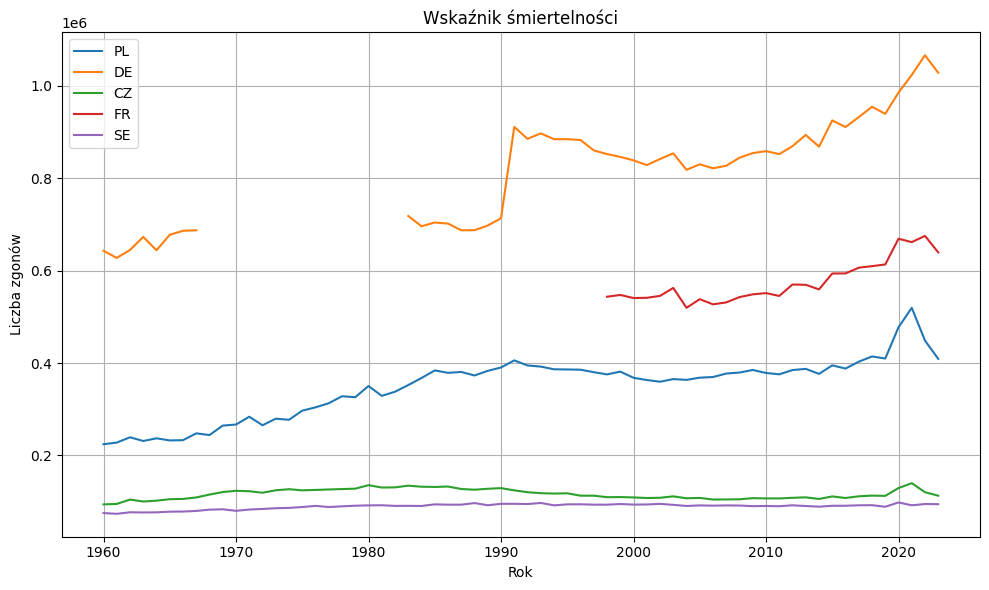

In [ ]:
#2.2
countries = ['PL', 'DE', 'CZ', 'FR', 'SE']
df_death = df_melted[(df_melted['indic_de'] == 'DEATH') & (df_melted['geo'].isin(countries))]

plt.figure(figsize=(10, 6))
for country in countries:
  subset = df_death[df_death['geo'] == country]
  plt.plot(subset['year'], subset['value'], label=country)

plt.title('Wskaźnik śmiertelności')
plt.xlabel('Rok')
plt.ylabel('Liczba zgonów')
plt.legend()
plt.grid(True)
plt.tight_layout();

In [ ]:
#2.3
df_2023 = df_melted[(df_melted['year'] == 2023) & (df_melted['indic_de'] == 'POPT')]
top20 = df_2023[df_2023['geo'].str.len() == 2].sort_values(by='value', ascending=False).head(20)

In [ ]:
fig = px.pie(top20, names='geo', values='value', title='Struktura ludności 20 najludniejszych państw UE (2023)')
fig.show()

In [ ]:
#2.4
df_filtered = df_melted[(df_melted['year'] == 2023) & (df_melted['indic_de'] == 'AVG')]
pl = df_filtered.loc[df_filtered['geo'] == 'PL', 'value']
pl

,value
98326,36687353.0


In [ ]:
pop_pl = pl.values[0]
df_filtered = df_filtered.copy()
df_filtered['diff'] = abs(df_filtered['value'] - pop_pl)
df_other = df_filtered[df_filtered['geo'] != 'PL'].dropna(subset=['value'])
top = df_other.sort_values('diff').head(3)

print(top[['geo', 'value', 'diff']])

      geo       value        diff
98302  ES  48352528.0  11665175.0
98328  RO  19061062.0  17626291.0
98324  NL  17877117.0  18810236.0


In [ ]:
#2.5
df_eu_list = []
periods = [
  ('EU27_2007', 2007, 2013),
  ('EU28', 2013, 2020),
  ('EU27_2020', 2020, 2023)
]

for geo_code, start_year, end_year in periods:
  df_period = df_melted[
    (df_melted['geo'] == geo_code) &
    (df_melted['year'].between(start_year, end_year)) &
    (df_melted['indic_de'].isin(['FLBIRTH', 'DEATH']))
  ]
  df_eu_list.append(df_period)
  df_eu = pd.concat(df_eu_list)

df_grouped = df_eu.groupby(['year', 'indic_de'])['value'].sum().reset_index()

fig = px.line(
  df_grouped,
  x='year',
  y='value',
  color='indic_de',
  title='Liczba narodzin i śmierci w UE (2007-2023)',
  labels={'value': 'Liczba', 'year': 'Rok', 'indic_de': 'Wskaźnik'}
)

fig.show()

**Zadanie 3** *


**3.1** Wyświetl różnicę liczby ludności zarejestrowanej w styczniu każdego roku dla pierwszego i ostatniego pomiaru dla każdej wartości w kolumnie `geo`. Wartość wyświetl w postaci nominalnej i procentowej.

**3.2** W którym Państwie nastąpiła największa zmiana liczby ludności (odrzuć wartości w kolumnie `geo`, które nie wskazują na jedno konkretne państwo)?

\* raczej dość trudne

In [ ]:
#3.1 ??? nie jestem pewna
df_clean = df_melted.dropna(subset=['value'])

result = (
  df_clean.sort_values(['geo', 'year'])
  .groupby('geo')
  .agg(
    first_year=('year', 'first'),
    last_year=('year', 'last'),
    first_value=('value', 'first'),
    last_value=('value', 'last')
  )
)

result['difference_nominal'] = result['last_value'] - result['first_value']
result['difference_percent'] = (
  (result['difference_nominal'] / result['first_value']) * 100
)

result = result.round({'difference_percent': 2})

print(result[['first_year', 'last_year', 'first_value', 'last_value', 'difference_nominal', 'difference_percent']])

            first_year  last_year  first_value   last_value  \
geo                                                           
AD                1985       2024        287.0      85101.0   
AL                1960       2023    1608800.0      44903.0   
AM                1996       2024    3247400.0    1413526.0   
AT                1960       2024    7047539.0          2.0   
AZ                1996       2024    7763000.0    5067206.0   
BA                1960       2024    3238989.0    3417089.0   
BE                1960       2024    9153489.0          2.6   
BG                1960       2024    7867374.0          1.4   
BY                1996       2020   10159569.0    9408350.0   
CH                1960       2024    5327827.0    4451532.0   
CY                1960       2024     572783.0          0.2   
CZ                1960       2024    9602006.0          2.4   
DE                1960       2024   55607705.0         18.6   
DE_TOT            1960       2024   72814900.0         

In [ ]:
#3.2
df_countries = result[result.index.str.match(r'^[A-Z]{2,3}$')]
max_change = df_countries['difference_nominal'].abs().idxmax()
df_countries.loc[[max_change]]

,first_year,last_year,first_value,last_value,difference_nominal,difference_percent
geo,,,,,,
RU,1996,2014,148160126.0,35433.0,-148124693.0,-99.98
